                                        Churn Project

In [1]:
#load libraries
import os
import pandas as pd
import numpy as np

In [2]:
#Set working directory
os.chdir(r"C:/Users/Subbu/Documents/PythonChurn")

In [3]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix 

C:\Users\Subbu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#Loading Train and test data
dfTrain=pd.read_csv("Train_data.csv")
dfTest=pd.read_csv("Test_data.csv")

                                    Missing analysis

In [8]:
missing_Train = pd.DataFrame(dfTrain.isnull().sum())

#Reset index
missing_Train = missing_Train.reset_index()

#Rename variable
missing_Train = missing_Train.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_Train['Missing_percentage'] = (missing_Train['Missing_percentage']/len(dfTrain))*100
missing_Train


In [9]:
missing_Test = pd.DataFrame(dfTest.isnull().sum())

#Reset index
missing_Test = missing_Test.reset_index()

#Rename variable
missing_Test = missing_Test.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_Test['Missing_percentage'] = (missing_Test['Missing_percentage']/len(dfTest))*100
missing_Test


                            Outler analysis

In [10]:
#Assigning levels to the categories in train data
for i in range(0, dfTrain.shape[1]):
    #print(i)
    if(dfTrain.iloc[:,i].dtypes == 'object'):
        dfTrain.iloc[:,i] = pd.Categorical(dfTrain.iloc[:,i])
        #print(marketing_train[[i]])
        dfTrain.iloc[:,i] = dfTrain.iloc[:,i].cat.codes 
        dfTrain.iloc[:,i] = dfTrain.iloc[:,i].astype('object')

In [11]:
#Assigning levels to the categories in test data
for i in range(0, dfTest.shape[1]):
    #print(i)
    if(dfTest.iloc[:,i].dtypes == 'object'):
        dfTest.iloc[:,i] = pd.Categorical(dfTest.iloc[:,i])
        #print(marketing_train[[i]])
        dfTest.iloc[:,i] = dfTest.iloc[:,i].cat.codes 
        dfTest.iloc[:,i] = dfTest.iloc[:,i].astype('object')

In [12]:
cnames =  ["account length", "area code", "number vmail messages", "total day minutes", "total day calls", "total day charge", "total eve minutes", "total eve calls",
           "total eve charge", "total night minutes", "total night calls","total night charge","total intl minutes","total intl calls","total intl charge","number customer service calls"]
for i in cnames:
    
    q75, q25 = np.percentile(dfTrain.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
       
    dfTrain = dfTrain.drop(dfTrain[dfTrain.loc[:,i] < min].index)
    dfTrain = dfTrain.drop(dfTrain[dfTrain.loc[:,i] > max].index)

In [13]:
for i in cnames:
    
    q75, q25 = np.percentile(dfTest.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
       
    dfTest = dfTest.drop(dfTest[dfTest.loc[:,i] < min].index)
    dfTest = dfTest.drop(dfTest[dfTest.loc[:,i] > max].index)

                                Feature Selection

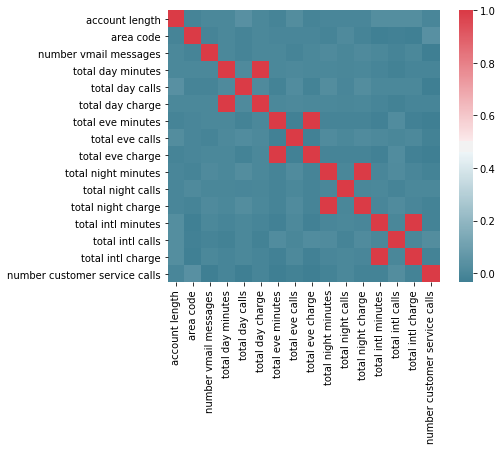

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
churn_corr = dfTrain.loc[:,cnames]
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
churncorr = churn_corr.corr()

#Plot using seaborn library
sns.heatmap(churncorr, mask=np.zeros_like(churncorr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

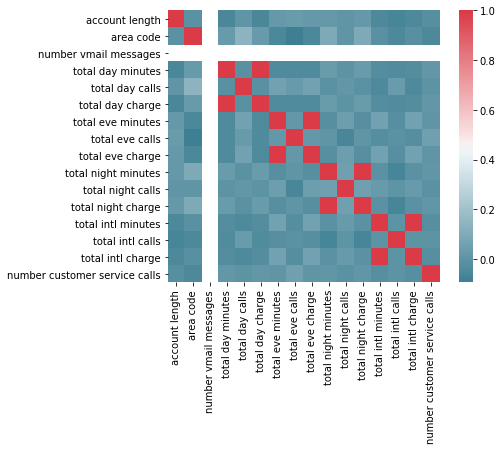

In [17]:
churn_corr = dfTest.loc[:,cnames]
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
churncorr = churn_corr.corr()

#Plot using seaborn library
sns.heatmap(churncorr, mask=np.zeros_like(churncorr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [19]:
from scipy.stats import chi2_contingency
cat_names = ["state", "phone number", "international plan", "voice mail plan"]
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(dfTrain['Churn'], dfTrain[i]))
    print(p)

state
0.020743472994456533
phone number
0.49110991242621804
international plan
1.6860769270699622e-53
voice mail plan
2.6438944498671704e-07


In [20]:
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(dfTest['Churn'], dfTest[i]))
    print(p)

state
0.029817481206772953
phone number
0.4829331215230557
international plan
1.1435323699603588e-11
voice mail plan
0.24163532344209337


In [21]:
dfTrain = dfTrain.drop(['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'phone number'], axis=1)
dfTest = dfTest.drop(['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'phone number'], axis=1)

In [22]:
#Divide data into train and test
churn_X_Train = dfTrain.values[:,0:15]
churn_Y_Train = dfTrain.values[:,15]
churn_X_Test = dfTest.values[:,0:15]
churn_Y_Test = dfTest.values[:,15]
churn_Y_Train=churn_Y_Train.astype(int)
churn_Y_Test=churn_Y_Test.astype(int)

                                Decision tree model

In [23]:
DT_churn_model = tree.DecisionTreeClassifier(criterion = "entropy").fit(churn_X_Train, churn_Y_Train)

In [25]:
DT_churn_predict = DT_churn_model.predict(churn_X_Test)
DT_churn_confusionMatrix = confusion_matrix22(churn_Y_Test,DT_churn_predict)
DT_churn_confusionMatrix = pd.crosstab(churn_Y_Test,DT_churn_predict)
DT_churn_confusionMatrix

col_0,0,1
row_0,,
0,630,38
1,24,67


In [26]:
TP = DT_churn_confusionMatrix.iloc[0,0]
FN = DT_churn_confusionMatrix.iloc[0,1]
FP = DT_churn_confusionMatrix.iloc[1,0]
TN = DT_churn_confusionMatrix.iloc[1,1]
DTAccuracy = accuracy_score(churn_Y_Test,DT_churn_predict)*100
DTAccuracy
#Accuracy 92.75

91.83135704874836

In [27]:
FNR = (FN*100)/(FN+TP)
FNR
#FNR 5.68 %

5.688622754491018

In [28]:
FPR = (FP*100)/(FP+TN)
FPR
#FPR 26.37%

26.373626373626372

                                        Random forest model

In [29]:
from sklearn.ensemble import RandomForestClassifier
RF_churn_model = RandomForestClassifier(n_estimators=500).fit(churn_X_Train,churn_Y_Train )
RF_churn_predictions = RF_churn_model.predict(churn_X_Test)
RF_churn_confusionMatrix = pd.crosstab(churn_Y_Test, RF_churn_predictions)
RF_churn_confusionMatrix

C:\Users\Subbu\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


col_0,0,1
row_0,,
0,666,2
1,35,56


In [30]:
TP = RF_churn_confusionMatrix.iloc[0,0]
FN = RF_churn_confusionMatrix.iloc[0,1]
FP = RF_churn_confusionMatrix.iloc[1,0]
TN = RF_churn_confusionMatrix.iloc[1,1]
DTAccuracy = accuracy_score(churn_Y_Test,RF_churn_predictions)*100
DTAccuracy
#Accuracy 95.12

95.12516469038208

In [31]:
FNR = (FN*100)/(FN+TP)
FNR
#FNR 0.299

0.2994011976047904

In [32]:
FPR = (FP*100)/(FP+TN)
FPR
#FPR 38.46

38.46153846153846

In [33]:
dftrain_logit = dfTrain #pd.DataFrame(dfTrain['Churn'])
dftrain_logit['state']= dftrain_logit['state'].astype(int)
dftrain_logit['international plan']= dftrain_logit['international plan'].astype(int)
dftrain_logit['voice mail plan']= dftrain_logit['voice mail plan'].astype(int)
dftrain_logit['Churn']= dftrain_logit['Churn'].astype(int)


                                    Logistic regression model

In [34]:
#Built Logistic Regression
import statsmodels.api as sm

train_cols = dftrain_logit.columns[1:15]
log_churn_model = sm.Logit(dftrain_logit['Churn'], dftrain_logit[train_cols].astype(float)).fit()

log_churn_model.summary()

Optimization terminated successfully.
         Current function value: 0.255621
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2797
Model:                          Logit   Df Residuals:                     2783
Method:                           MLE   Df Model:                           13
Date:                Sun, 16 Dec 2018   Pseudo R-squ.:                  0.2564
Time:                        12:33:56   Log-Likelihood:                -714.97
converged:                       True   LL-Null:                       -961.51
                                        LLR p-value:                 4.344e-97
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
account length                   -0.0013      0.002     -0.726      0.468      -0.005       0.002
area code                        -0.0129      0.001     -8.789      0.000      -0.016      -0.010
international plan                2.3879      0.177     13.516      0.000       2.042       2.734
voice mail plan                  -2.6113      0.762     -3.428      0.001      -4.104      -1.118
number vmail messages             0.0453      0.024      1.913      0.056      -0.001       0.092
total day calls                  -0.0078      0.003     -2.275      0.023      -0.014      -0.001
total day charge                  0.1125      0.009     13.201      0.000       0.096       0.129
total eve calls                  -0.0115      0.004     -3.249      0.001      -0.018      -0.005
total eve charge                  0.0983      0.016      5.985      0.000       0.066       0.131
total night calls                -0.0062      0.003     -1.773      0.076      -0.013       0.001
total night charge                0.0700      0.030      2.301      0.021       0.010       0.130
total intl calls                 -0.1655      0.035     -4.705      0.000      -0.235      -0.097
total intl charge                 0.1965      0.097      2.025      0.043       0.006       0.387
number customer service calls    -0.0391      0.070     -0.559      0.576      -0.176       0.098
=================================================================================================
"""

In [36]:
dfTest['Actual_prob'] = log_churn_model.predict(dfTest[train_cols].astype(float))

dfTest['ActualVal'] = 1
dfTest.loc[dfTest.Actual_prob < 0.5, 'ActualVal'] = 0
log_churn_confusionMatrix = pd.crosstab(dfTest['Churn'], dfTest['ActualVal'])
log_churn_confusionMatrix

ActualVal,0,1
Churn,,
0,649,19
1,67,24


In [37]:
TP = log_churn_confusionMatrix.iloc[0,0]
FN = log_churn_confusionMatrix.iloc[0,1]
FP = log_churn_confusionMatrix.iloc[1,0]
TN = log_churn_confusionMatrix.iloc[1,1]
logAccuracy=((TP+TN)*100)/(TP+TN+FP+FN)
logAccuracy
#Accuracy 88.66

88.66930171277997

In [38]:
FNR = (FN*100)/(FN+TP)
FNR
#FNR 2.84

2.844311377245509

In [39]:
FPR = (FP*100)/(FP+TN)
FPR
#FPR 73.62

73.62637362637362

                                    KNN Model

In [40]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_churn_model = KNeighborsClassifier(n_neighbors = 7).fit(churn_X_Train, churn_Y_Train)
#predict test cases
KNN_churn_Predictions = KNN_churn_model.predict(churn_X_Test)
knn_churn_confusionMatrix = pd.crosstab(churn_Y_Test,KNN_churn_Predictions)
knn_churn_confusionMatrix

col_0,0,1
row_0,,
0,667,1
1,84,7


In [41]:
TP = knn_churn_confusionMatrix.iloc[0,0]
FN = knn_churn_confusionMatrix.iloc[0,1]
FP = knn_churn_confusionMatrix.iloc[1,0]
TN = knn_churn_confusionMatrix.iloc[1,1]
knnAccuracy=((TP+TN)*100)/(TP+TN+FP+FN)
knnAccuracy
#Accuracy 88.80

88.80105401844533

In [42]:
FNR = (FN*100)/(FN+TP)
FNR
#FNR 0.14

0.1497005988023952

In [43]:
FPR = (FP*100)/(FP+TN)
FPR
#FPR 92.30

92.3076923076923

                                    Naive Bayes model

In [44]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_churn_model = GaussianNB().fit(churn_X_Train, churn_Y_Train)

#predict test cases
NB_churn_Predictions = NB_churn_model.predict(churn_X_Test)
NB_churn_confusionMatrix = pd.crosstab(churn_Y_Test,NB_churn_Predictions)
NB_churn_confusionMatrix

col_0,0,1
row_0,,
0,626,42
1,56,35


In [45]:
TP = NB_churn_confusionMatrix.iloc[0,0]
FN = NB_churn_confusionMatrix.iloc[0,1]
FP = NB_churn_confusionMatrix.iloc[1,0]
TN = NB_churn_confusionMatrix.iloc[1,1]

NBAccuracy=((TP+TN)*100)/(TP+TN+FP+FN)
NBAccuracy
#Accuracy 87.08

87.08827404479578

In [46]:
FNR = (FN*100)/(FN+TP)
FNR
#FNR 60.28

6.287425149700598

In [47]:
FPR = (FP*100)/(FP+TN)
FPR
#FPR 61.53

61.53846153846154